# 数据预处理_生成定性与定量距离矩阵

1. 选择需要处理的文件（可以多选）
2. 选择计算距离的方式（默认为 -log(x + 1)）:
   - 欧氏距离
   - 皮尔森距离

In [9]:
%run choose.py
myargs = get_default()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\\\x00\x00\x03\x02\x08\x06\x00\x00\x00TZ\xd2\xc0\…

Label(value='表达量文件：')

RadioButtons(options=('hesc.cbrad5.gene.exp', 'hesc.cbrad5.gene.exp.PC1.PC2', 'hesc.cbrad5.gene.exp.hvgs', 'he…

Text(value='', description='File:', layout=Layout(width='50%'), placeholder='输入文件相对或者绝对路径')

Label(value='Celltype 文件：')

Checkbox(value=True, description='/mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig2/PERMANOVA/al…

Text(value='', description='File:', layout=Layout(width='50%'), placeholder='输入文件相对或者绝对路径')

FloatRangeSlider(value=(15.0, 85.0), continuous_update=False, description='Cutoff (%, 左边为剪枝比例,中间为错配罚分比例,右边为匹配得…

Label(value='配对类型：')

# 显示读入文件的信息

In [2]:
# ffile_list = []
# for i in myargs['checkboxes'].children:
#     if i.value:
#         ffile_list.append('/mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig5/modelta/' + str(i.description) + '.csv')
# for i in myargs['textarea'].value.replace(" ", "").replace("\n", "").replace("\t", "").split(","):
#     if i != '':
#         ffile_list.append(i)
ffile = '/mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig5/modelta/' + myargs['checkboxes'].value + '.csv'

celltypefile = myargs['text'].value if myargs['text'].value != '' else myargs['checkbox'].description
# 查看输入文件的详细信息
print('Celltype 文件:\n', ffile)
print("\nCelltype 文件:\n", celltypefile)
# print('Total: ', len(ffile_list))
# for i in enumerate(ffile_list):
#     print(i[0]+1, i[1])
# print("\ncelltype_file:\n",celltypefile)
print(myargs['cutoff'].value[0], myargs['cutoff'].value[1])

Celltype 文件:
 /mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig5/modelta/hesc.cbrad5.gene.exp.csv

Celltype 文件:
 /mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig2/PERMANOVA/all_tree_info_renameCelltype.Rds
15.0 70.0


# 导入库

In [3]:
# 导入库
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from tqdm.notebook import trange, tnrange,tqdm
import multiprocessing as mp
from copy import *
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics.pairwise import pairwise_distances

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.2.3 
2: package ‘datasets’ was built under R version 4.2.3 
3: package ‘utils’ was built under R version 4.2.3 
4: package ‘grDevices’ was built under R version 4.2.3 
5: package ‘graphics’ was built under R version 4.2.3 
6: package ‘stats’ was built under R version 4.2.3 
7: package ‘stats’ in options("defaultPackages") was not found 


# 加载需要读入的文件

In [4]:
# 加载RDS文件
rds_file = ro.r['readRDS'](celltypefile)
# 将RDS文件转换为DataFrame对象
pandas2ri.activate()
dfr = pandas2ri.rpy2py(rds_file)

# 对应的细胞类型
my_dict_celltype = {}
for i in range(len(dfr)):
    my_dict_celltype['{}_{}-1'.format(dfr.iloc[i, 2], dfr.iloc[i, 1])] = dfr.iloc[i,3]

# 对应的细胞名称
my_dict_label = {}
for i in range(len(dfr)):
    my_dict_label['{}_{}-1'.format(dfr.iloc[i, 2], dfr.iloc[i, 1])] = dfr.iloc[i,2].split('-')[0] + '-' + dfr.iloc[i,0] 

data_list = []
# 循环读入输入的所有的文件
# for iii in tqdm(ffile_list):
data = pd.read_csv(ffile, index_col = 0, header = 0) #nrows = 3
data = data.T

for i in data.index:
    if not my_dict_celltype.get (i):
        my_dict_celltype[i] = 'None'
for i in data.index:
    if not my_dict_label.get (i):
        my_dict_label[i] = 'None'

data_tmp = data.copy(deep=True)
# 剔除不是leaf的行，并且把行名改为类型名
df_celltype = data_tmp.rename(index=my_dict_celltype)
df_celltype = df_celltype.drop(labels=['None'], axis=0)
# 剔除不是leaf的行，并且把行名改为细胞名称
df_label = data.rename(index=my_dict_label)
df_label = df_label.drop(labels=['None'], axis=0)
# data_list.append(df_label)

# 计算欧氏距离

In [5]:
# 循环执行所有的文件
# for df in tqdm(data_list):
    #标准化数据
    # scaler = StandardScaler()
    #对数据进行标准化
    # scaled_data = scaler.fit_transform(df)
    # # 转换为标准化后的 DataFrame
    # scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns, index = df.index)
    # scaled_df

# 欧氏距离
distances = pd.DataFrame(pairwise_distances(df_label, metric='euclidean'), index = df_label.index, columns = df_label.index)
# 欧氏距离 -log(x + 1) 处理
distances_log = -np.log1p(distances)
distances_log

,A1-N598_16,A1-N99_1,A1-N522_2,A1-N997_1,A1-N460_1,A1-N723_1,A1-N598_16,A1-N39_530,A1-N39_530,A1-N4_80,...,GS-N280_1,GS-N17_36,GS-N11_1873,GS-N1465_1,GS-N1024_1,GS-N1266_2,GS-N11_1873,GS-N124_27,GS-N11_1873,GS-N556_1
A1-N598_16,-0.000000,-3.638499,-3.597280,-4.106817,-3.469604,-3.680090,-4.158971,-3.677602,-3.998376,-3.493620,...,-3.709085,-3.716769,-3.725550,-3.709155,-3.642511,-3.622911,-4.118449,-3.669997,-3.666678,-3.687493
A1-N99_1,-3.638499,-0.000000,-3.565023,-4.122119,-3.449061,-3.694404,-4.152277,-3.602301,-4.031597,-3.701555,...,-3.772834,-3.781246,-3.778351,-3.779509,-3.716430,-3.700484,-4.144485,-3.753997,-3.730337,-3.755474
A1-N522_2,-3.597280,-3.565023,-0.000017,-4.090793,-3.353390,-3.600179,-4.083879,-3.536784,-3.998597,-3.648692,...,-3.667324,-3.700541,-3.669038,-3.679953,-3.606505,-3.587072,-4.117252,-3.625732,-3.626660,-3.645188
A1-N997_1,-4.106817,-4.122119,-4.090793,-0.000000,-4.066375,-4.123183,-4.298053,-4.126591,-4.246899,-4.146482,...,-4.113904,-4.120524,-4.116698,-4.128112,-4.103765,-4.084665,-4.288860,-4.112404,-4.103315,-4.127454
A1-N460_1,-3.469604,-3.449061,-3.353390,-4.066375,-0.000000,-3.535484,-4.102975,-3.435559,-3.968720,-3.523908,...,-3.658285,-3.672343,-3.672741,-3.665961,-3.595585,-3.565304,-4.105861,-3.623646,-3.609887,-3.633320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS-N1266_2,-3.622911,-3.700484,-3.587072,-4.084665,-3.565304,-3.630168,-4.110982,-3.729837,-3.947955,-3.683474,...,-3.238446,-3.319959,-3.312271,-3.319679,-3.106820,-0.000000,-3.995338,-3.201509,-3.124426,-3.266918
GS-N11_1873,-4.118449,-4.144485,-4.117252,-4.288860,-4.105861,-4.143236,-4.272229,-4.159732,-4.213061,-4.156440,...,-4.041241,-4.047428,-4.049560,-4.051108,-4.018428,-3.995338,-0.000008,-4.046207,-4.015395,-4.046471
GS-N124_27,-3.669997,-3.753997,-3.625732,-4.112404,-3.623646,-3.676104,-4.156535,-3.778201,-3.984437,-3.735339,...,-3.368165,-3.438719,-3.410747,-3.412900,-3.255311,-3.201509,-4.046207,-0.000017,-3.303685,-3.371258
GS-N11_1873,-3.666678,-3.730337,-3.626660,-4.103315,-3.609887,-3.661777,-4.126012,-3.765226,-3.970753,-3.736415,...,-3.328068,-3.388308,-3.370961,-3.369719,-3.213333,-3.124426,-4.015395,-3.303685,-0.000015,-3.353377


# 保存文件 df_euclidean_log.csv

In [6]:
#distances_log.to_csv('df_euclidean_log.csv', encoding='utf-8') #6min

# 计算皮尔森系数

In [7]:
corr_coeffs = pd.DataFrame(np.corrcoef(df_label), index = df_label.index, columns = df_label.index)
corr_coeffs

,A1-N598_16,A1-N99_1,A1-N522_2,A1-N997_1,A1-N460_1,A1-N723_1,A1-N598_16,A1-N39_530,A1-N39_530,A1-N4_80,...,GS-N280_1,GS-N17_36,GS-N11_1873,GS-N1465_1,GS-N1024_1,GS-N1266_2,GS-N11_1873,GS-N124_27,GS-N11_1873,GS-N556_1
A1-N598_16,1.000000,0.826001,0.835722,0.597582,0.871824,0.814859,0.522718,0.811611,0.665526,0.870253,...,0.796802,0.794221,0.790615,0.797983,0.821056,0.823385,0.567864,0.812853,0.810981,0.806725
A1-N99_1,0.826001,1.000000,0.849720,0.589659,0.880425,0.812451,0.536433,0.841758,0.646238,0.805155,...,0.772522,0.769110,0.770675,0.770556,0.795556,0.797182,0.550168,0.781610,0.788631,0.781709
A1-N522_2,0.835722,0.849720,1.000000,0.608531,0.898676,0.842316,0.589555,0.858432,0.663210,0.820613,...,0.812286,0.799567,0.812380,0.808478,0.832666,0.834660,0.565853,0.828060,0.824663,0.821728
A1-N997_1,0.597582,0.589659,0.608531,1.000000,0.625036,0.594353,0.412342,0.587422,0.487159,0.572106,...,0.587158,0.580983,0.584837,0.575906,0.592981,0.600104,0.432443,0.590497,0.590966,0.578655
A1-N460_1,0.871824,0.880425,0.898676,0.625036,1.000000,0.860847,0.568064,0.883841,0.680849,0.859205,...,0.813488,0.808671,0.808683,0.811756,0.834294,0.839448,0.571697,0.826715,0.828386,0.823975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS-N1266_2,0.823385,0.797182,0.834660,0.600104,0.839448,0.829187,0.545965,0.785261,0.686326,0.805434,...,0.920433,0.905730,0.907398,0.906277,0.938794,1.000000,0.649756,0.926888,0.935876,0.916537
GS-N11_1873,0.567864,0.550168,0.565853,0.432443,0.571697,0.558260,0.413056,0.537673,0.498948,0.543607,...,0.626788,0.621233,0.620168,0.620007,0.641430,0.649756,1.000000,0.625302,0.641189,0.626218
GS-N124_27,0.812853,0.781610,0.828060,0.590497,0.826715,0.817712,0.521534,0.771161,0.673095,0.790800,...,0.899436,0.883817,0.890465,0.890212,0.919729,0.926888,0.625302,1.000000,0.910799,0.899506
GS-N11_1873,0.810981,0.788631,0.824663,0.590966,0.828386,0.820593,0.540874,0.773688,0.676424,0.787402,...,0.905630,0.893156,0.897081,0.897643,0.924851,0.935876,0.641189,0.910799,1.000000,0.901512


# 保存文件 df_pearson.csv

In [8]:
#corr_coeffs.to_csv('df_pearson.csv', encoding='utf-8') #6min

# 定量计算矩阵

In [101]:
# 对dataframe所有元素排序
series = distances_log.select_dtypes(include=[np.number]).stack()  # 一维化
sorted_series = series.sort_values()

zero_index = int(len(sorted_series) * myargs['cutoff'].value[1]/100)   # 0 标志位
prune_index = int(len(sorted_series) * myargs['cutoff'].value[0]/100)  # 剪枝标志位
zero_value = sorted_series.iloc[zero_index]
prune_value = sorted_series.iloc[prune_index]

# 消除噪音
# noise_positions = np.where(sorted_series > -3)
# noise_positions[0][0]/len(sorted_series)
# 0.9991490317416847
noise = sorted_series.iloc[int(len(sorted_series) * 0.999)]


#定义一个函数 
def func(x, pv, zv, P, noise): 
    # 如果pv = zv
    if pv == zv:
        return (x - zv) * P
    else:
        if x > noise:
            return (noise - zv) * P / (zv - pv)
        elif x < pv:
            return -1 * P 
        else:
            return (x - zv) * P / (zv - pv)
    

distances_quantitive = distances_log.applymap(lambda x: func(x, prune_value, zero_value, myargs['P'].children[0].value, noise))
distances_quantitive

,A1-N598_16,A1-N99_1,A1-N522_2,A1-N997_1,A1-N460_1,A1-N723_1,A1-N598_16,A1-N39_530,A1-N39_530,A1-N4_80,...,GS-N280_1,GS-N17_36,GS-N11_1873,GS-N1465_1,GS-N1024_1,GS-N1266_2,GS-N11_1873,GS-N124_27,GS-N11_1873,GS-N556_1
A1-N598_16,1.157525,-0.170860,-0.084036,-1.000000,0.184902,-0.258468,-1.0,-0.253226,-0.928911,0.134315,...,-0.319542,-0.335728,-0.354225,-0.319691,-0.179312,-0.138025,-1.000000,-0.237208,-0.230216,-0.274061
A1-N99_1,-0.170860,1.157525,-0.016090,-1.000000,0.228175,-0.288619,-1.0,-0.094612,-0.998887,-0.303683,...,-0.453824,-0.471544,-0.465447,-0.467886,-0.335014,-0.301426,-1.000000,-0.414145,-0.364309,-0.417257
A1-N522_2,-0.084036,-0.016090,1.157525,-1.000000,0.429699,-0.090142,-1.0,0.043395,-0.929376,-0.192330,...,-0.231578,-0.301545,-0.235187,-0.258179,-0.103468,-0.062534,-1.000000,-0.143966,-0.145922,-0.184950
A1-N997_1,-1.000000,-1.000000,-1.000000,1.157525,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
A1-N460_1,0.184902,0.228175,0.429699,-1.000000,1.157525,0.046134,-1.0,0.256615,-0.866443,0.070516,...,-0.212538,-0.242150,-0.242988,-0.228707,-0.080465,-0.016681,-1.000000,-0.139572,-0.110591,-0.159950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS-N1266_2,-0.138025,-0.301426,-0.062534,-1.000000,-0.016681,-0.153311,-1.0,-0.363256,-0.822703,-0.265595,...,0.671819,0.500117,0.516313,0.500707,0.949077,1.157525,-0.922512,0.749623,0.911992,0.611845
GS-N11_1873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.971147,-0.922512,1.157525,-1.000000,-0.964758,-1.000000
GS-N124_27,-0.237208,-0.414145,-0.143966,-1.000000,-0.139572,-0.250071,-1.0,-0.465131,-0.899548,-0.374846,...,0.398575,0.249961,0.308881,0.304346,0.636294,0.749623,-1.000000,1.157525,0.534398,0.392060
GS-N11_1873,-0.230216,-0.364309,-0.145922,-1.000000,-0.110591,-0.219893,-1.0,-0.437800,-0.870724,-0.377112,...,0.483036,0.356147,0.392686,0.395301,0.724717,0.911992,-0.964758,0.534398,1.157525,0.429726


In [104]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['figure.figsize'] = (13, 5)
f = plt.figure()

sns.histplot(sorted_series, kde=False)
plt.ylabel("nums", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("", fontsize=20)

# 指定特定数字
zero_value_num = zero_value
prune_value_num = prune_value

# 绘制竖线
plt.axvline(x=zero_value_num, color='r', linestyle='--')
plt.axvline(x=prune_value_num, color='r', linestyle='--')

plt.show()

KeyboardInterrupt: 

<Figure size 1300x500 with 0 Axes>

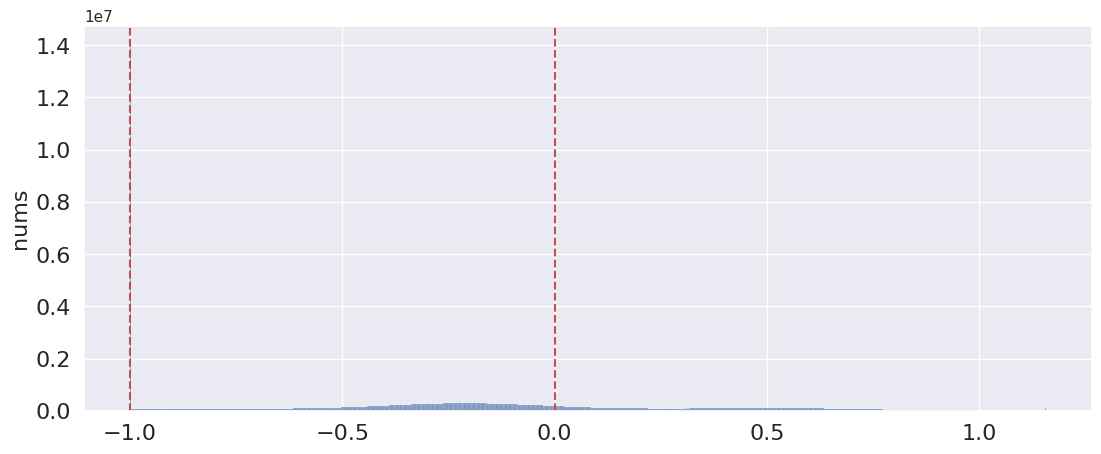

In [103]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['figure.figsize'] = (13, 5)
f = plt.figure()

sns.histplot(distances_quantitive.select_dtypes(include=[np.number]).stack(), kde=False)
plt.ylabel("nums", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("", fontsize=20)

# 指定特定数字
zero_value_num = 0
prune_value_num = -1

# 绘制竖线
plt.axvline(x=zero_value_num, color='r', linestyle='--')
plt.axvline(x=prune_value_num, color='r', linestyle='--')

plt.show()

# 保存文件 df_euclidean_quantitive_x_x.csv

In [10]:
# distances_quantitive.to_csv('df_euclidean_quantitive_'+ str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', encoding='utf-8') #6min

# 分块操作

In [105]:
# def get_type(x):
#     return x.split('-')[0]
# list(set(map(get_type, distances_quantitive.index)))
t1
t2
print(myargs['ccc'].children)
for i in myargs['ccc'].children:
    if i.value == True:
        # print(i.description)
        t1 = i.description.split('-')[0]
        t2 = i.description.split('-')[1]
        # print(t1, t2)
        cut_row = []
        cut_col = []
        cut_row_name = {}
        cut_col_name = {}
        for jj,j in enumerate(distances_quantitive.index):
            if j.split('-')[0] == t1:
                cut_row.append(jj)
                cut_row_name[j] = j.split('-')[1]
        for kk,k in enumerate(distances_quantitive.columns):
            if k.split('-')[0] == t2:
                cut_col.append(kk)
                cut_row_name[k] = k.split('-')[1]
                
        df_tmp = distances_quantitive.iloc[cut_row,cut_col]
        df_tmp = df_tmp.rename(index = cut_row_name, columns = cut_row_name)
        df_tmp.to_csv(t1 + '_' + t2 + '_quantitive_' + str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', encoding='utf-8') #6min


(Checkbox(value=True, description='A1-A1'), Checkbox(value=True, description='A1-G2'), Checkbox(value=True, description='A1-G11'), Checkbox(value=True, description='A1-GS'), Checkbox(value=True, description='G2-G2'), Checkbox(value=True, description='G2-G11'), Checkbox(value=True, description='G2-GS'), Checkbox(value=True, description='G11-G11'), Checkbox(value=True, description='G11-GS'), Checkbox(value=True, description='GS-GS'))


In [106]:
#df_tmp

In [107]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# sns.set()

# # x = np.random.randn(1000) 
# x = df_tmp.select_dtypes(include=[np.number]).stack()  # 一维化
# x
# plt.rcParams['figure.figsize'] = (13, 5)
# f = plt.figure()

# f.add_subplot(1, 2, 1)
# sns.histplot(x, kde=False)  # 使用histplot函数代替distplot函数
# plt.ylabel("nums", fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.title(t1+'_'+t2, fontsize=20)

# plt.show()

In [108]:
# dfsss = pd.read_csv('/home/ee_while/JOB240131/A1_G2_15.0_55.0.csv', na_values='NAN', header = 0, index_col = 0)
# row = dfsss.index.tolist()
# col = dfsss.columns.tolist()
# score_dict = {}
# for i in range(len(row)):
#     for j in range(len(col)):
#         score_dict[str(row[i])+ '_' + str(col[j])] = dfsss.values[i][j]
# score_dict

# 皮尔森定量计算

In [109]:
# 对dataframe所有元素排序
series_p = corr_coeffs.select_dtypes(include=[np.number]).stack()  # 一维化
sorted_series_p = series_p.sort_values()

zero_index_p = int(len(sorted_series_p) * myargs['cutoff'].value[1]/100)   # 0 标志位
prune_index_p = int(len(sorted_series_p) * myargs['cutoff'].value[0]/100)  # 剪枝标志位
zero_value_p = sorted_series_p.iloc[zero_index_p]
prune_value_p = sorted_series_p.iloc[prune_index_p]

noise_p = sorted_series_p.iloc[int(len(sorted_series_p) * 0.999)]

corr_coeffs_quantitive = corr_coeffs.applymap(lambda x: func(x, prune_value_p, zero_value_p, myargs['P'].children[0].value, noise_p))
corr_coeffs_quantitive

,A1-N598_16,A1-N99_1,A1-N522_2,A1-N997_1,A1-N460_1,A1-N723_1,A1-N598_16,A1-N39_530,A1-N39_530,A1-N4_80,...,GS-N280_1,GS-N17_36,GS-N11_1873,GS-N1465_1,GS-N1024_1,GS-N1266_2,GS-N11_1873,GS-N124_27,GS-N11_1873,GS-N556_1
A1-N598_16,0.484780,-0.127292,-0.079364,-1.00000,0.098645,-0.182230,-1.0,-0.198250,-0.918556,0.090900,...,-0.271268,-0.283993,-0.301772,-0.265444,-0.151676,-0.140192,-1.000000,-0.192123,-0.201354,-0.222338
A1-N99_1,-0.127292,0.484780,-0.010344,-1.00000,0.141058,-0.194106,-1.0,-0.049600,-1.000000,-0.230081,...,-0.390984,-0.407808,-0.400091,-0.400681,-0.277409,-0.269393,-1.000000,-0.346175,-0.311554,-0.345688
A1-N522_2,-0.079364,-0.010344,0.484780,-1.00000,0.231049,-0.046847,-1.0,0.032614,-0.929976,-0.153863,...,-0.194917,-0.257631,-0.194454,-0.213695,-0.094431,-0.084601,-1.000000,-0.117144,-0.133890,-0.148363
A1-N997_1,-1.000000,-1.000000,-1.000000,0.48478,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
A1-N460_1,0.098645,0.141058,0.231049,-1.00000,0.484780,0.044523,-1.0,0.157900,-0.842999,0.036426,...,-0.188992,-0.212742,-0.212687,-0.197532,-0.086405,-0.060989,-1.000000,-0.123774,-0.115533,-0.137284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS-N1266_2,-0.140192,-0.269393,-0.084601,-1.00000,-0.060989,-0.111587,-1.0,-0.328175,-0.815998,-0.228704,...,0.338327,0.265827,0.274053,0.268525,0.428859,0.484780,-0.996314,0.370151,0.414469,0.319117
GS-N11_1873,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.996314,0.484780,-1.000000,-1.000000,-1.000000
GS-N124_27,-0.192123,-0.346175,-0.117144,-1.00000,-0.123774,-0.168167,-1.0,-0.397694,-0.881232,-0.300861,...,0.234793,0.157779,0.190559,0.189312,0.334854,0.370151,-1.000000,0.484780,0.290821,0.235140
GS-N11_1873,-0.201354,-0.311554,-0.133890,-1.00000,-0.115533,-0.153959,-1.0,-0.385236,-0.864818,-0.317616,...,0.265333,0.203828,0.223180,0.225954,0.360108,0.414469,-1.000000,0.290821,0.484780,0.245031


# 保存文件 df_pearson_quantitive_x_x.csv

In [110]:
# corr_coeffs_quantitive.to_csv('df_pearson_quantitive_'+ str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', encoding='utf-8') #6min

# 分块操作

In [111]:
for i in myargs['ccc'].children:
    if i.value == True:
        # print(i.description)
        t1 = i.description.split('-')[0]
        t2 = i.description.split('-')[1]
        # print(t1, t2)
    cut_row = []
    cut_col = []
    cut_row_name = {}
    cut_col_name = {}
    for jj,j in enumerate(distances_quantitive.index):
        if j.split('-')[0] == t1:
            cut_row.append(jj)
            cut_row_name[j] = j.split('-')[1]
    for kk,k in enumerate(distances_quantitive.columns):
        if k.split('-')[0] == t2:
            cut_col.append(kk)
            cut_row_name[k] = k.split('-')[1]

# #     # df_tmp = distances_quantitive.loc[cut_row, cut_row]
    df_tmp = distances_quantitive.iloc[cut_row,cut_col]
    df_tmp = df_tmp.rename(index = cut_row_name, columns = cut_row_name)
    df_tmp.to_csv(t1 + '_' + t2 + '_quantitive_pearson_' + str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', encoding='utf-8') #6min
    

# 定性计算矩阵

In [54]:
distances_qualitative = distances_quantitive
distances_qualitative.index = df_celltype.index
distances_qualitative.columns = list(df_celltype.index)
get_cellpair_mean = {}

with tqdm(total=((1+distances_qualitative.shape[1])*distances_qualitative.shape[1])/2,desc='all_list') as pbar:
    for i in range(distances_qualitative.shape[1]):
        for j in range(i+1):
            if get_cellpair_mean.get(str(distances_qualitative.index[i]) + '_' + str(distances_qualitative.index[j])):
                get_cellpair_mean[str(distances_qualitative.index[i]) + '_' + str(distances_qualitative.index[j])].append(distances_qualitative.values[i][j])
            elif get_cellpair_mean.get(str(distances_qualitative.index[j]) + '_' + str(distances_qualitative.index[i])):
                get_cellpair_mean[str(distances_qualitative.index[j]) + '_' + str(distances_qualitative.index[i])].append(distances_qualitative.values[i][j])
            else:
                get_cellpair_mean[str(distances_qualitative.index[i]) + '_' + str(distances_qualitative.index[j])] = []
                get_cellpair_mean[str(distances_qualitative.index[i]) + '_' + str(distances_qualitative.index[j])].append(distances_qualitative.values[i][j])

            pbar.update()
# get_cellpair_mean
distances_qualitative = pd.DataFrame(columns=['CellType1', 'CellType2', 'Scores'])
for (k,v) in get_cellpair_mean.items():
    distances_qualitative.loc[k] = [k.split('_')[0], k.split('_')[1], sum(v)/len(v)]
distances_qualitative

all_list:   0%|          | 0/46604685.0 [00:00<?, ?it/s]

,CellType1,CellType2,Scores
C6_C6,C6,C6,0.444482
C7_C6,C7,C6,0.189203
C7_C7,C7,C7,0.328369
R1_C6,R1,C6,-0.771779
R1_C7,R1,C7,-0.762233
...,...,...,...
C5_C9,C5,C9,-0.129793
C5_C3,C5,C3,-0.167583
C5_R2,C5,R2,-0.999566
C5_C4,C5,C4,-0.514327


# 保存文件 df_euclidean_qualitative_x_x.csv

In [55]:
distances_qualitative.to_csv('df_euclidean_qualitative_' + str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', index=False)

# 皮尔森定性计算

In [14]:
corr_coeffs_qualitative = corr_coeffs_quantitive
corr_coeffs_qualitative.index = df_celltype.index
corr_coeffs_qualitative.columns = list(df_celltype.index)
get_cellpair_mean_pearson = {}

with tqdm(total=((1+corr_coeffs_qualitative.shape[1])*corr_coeffs_qualitative.shape[1])/2,desc='all_list') as pbar:
    for i in range(corr_coeffs_qualitative.shape[1]):
        for j in range(i+1):
            if get_cellpair_mean_pearson.get(str(corr_coeffs_qualitative.index[i]) + '_' + str(corr_coeffs_qualitative.index[j])):
                get_cellpair_mean_pearson[str(corr_coeffs_qualitative.index[i]) + '_' + str(corr_coeffs_qualitative.index[j])].append(corr_coeffs_qualitative.values[i][j])
            elif get_cellpair_mean_pearson.get(str(corr_coeffs_qualitative.index[j]) + '_' + str(corr_coeffs_qualitative.index[i])):
                get_cellpair_mean_pearson[str(corr_coeffs_qualitative.index[j]) + '_' + str(corr_coeffs_qualitative.index[i])].append(corr_coeffs_qualitative.values[i][j])
            else:
                get_cellpair_mean_pearson[str(corr_coeffs_qualitative.index[i]) + '_' + str(corr_coeffs_qualitative.index[j])] = []
                get_cellpair_mean_pearson[str(corr_coeffs_qualitative.index[i]) + '_' + str(corr_coeffs_qualitative.index[j])].append(corr_coeffs_qualitative.values[i][j])

            pbar.update()
# get_cellpair_mean_pearson
corr_coeffs_qualitative = pd.DataFrame(columns=['CellType1', 'CellType2', 'Scores'])
for (k,v) in get_cellpair_mean_pearson.items():
    corr_coeffs_qualitative.loc[k] = [k.split('_')[0], k.split('_')[1], sum(v)/len(v)]
corr_coeffs_qualitative

all_list:   0%|          | 0/46604685.0 [00:00<?, ?it/s]

,CellType1,CellType2,Scores
C6_C6,C6,C6,0.198871
C7_C6,C7,C6,0.049615
C7_C7,C7,C7,0.121025
R1_C6,R1,C6,-0.738840
R1_C7,R1,C7,-0.726713
...,...,...,...
C5_C9,C5,C9,-0.195796
C5_C3,C5,C3,-0.258371
C5_R2,C5,R2,-0.999754
C5_C4,C5,C4,-0.525529


# 保存文件 df_euclidean_qualitative.csv

In [15]:
corr_coeffs_qualitative.to_csv('df_pearson_qualitative_' + str(myargs['cutoff'].value[0]) +'_'+ str(myargs['cutoff'].value[1]) +'.csv', index=False)